*Section 1: Dataset*

The dataset I chose is the ABA (American Bar Association)'s 509 disclosure reports from the year 2022. These are the most recent, up-to-date data about all first-year JD classes at ABA-accredited law schools in the United States of America. It includes such things as average undergraduate GPA, average LSAT score, number of denied/accepted/enrolled students in the class, and things such as part-time or full-time enrollment. This data is very important to me as a pre-law student who is currently in the process of exploring law schools before my application process next year. It helps me understand the certain benchmarks that I need to aim for to better improve my chances of acceptance at the law schools that I am hoping to attend, and gives me a good view of what an average law student's admissions resume looks like.

*Section 2: Exploratory Data Analysis*

The statistics that I am going to be looking at are the LSAT percentiles, GPA percentiles, and the yield (%admitted, given acceptance) rate, and the rank of the school (for this, I will be using US News and World Report's law school rankings in a column that I will add to the dataset, this information is independent of the ABA's disclosure requirements. This will take the form of a dummy column for top-14 and top-50 schools.)

In [27]:
import pandas as pd
import random

df = pd.read_csv("aba_data.csv")
df

,SchoolName,t14dummy,t50dummy,CompletedApplications,OffersAdmission,AcceptanceRate,EnrolleesFromApplicantPool,EnrollmentRateFromApp,EnrollmentRateFromOffers,OtherFirstYearEnrolles,TotalFYClassFT,TotalFYClassPT,TotalFYClassAll,All75LSAT,All50LSAT,All25LSAT,All75GPA,All50GPA,All25GPA
0,"CALIFORNIA-BERKELEY, UNIVERSITY OF",1,1,6722,838,12.47,251,3.73,29.95,27,278,0,278,172,170,167,3.90,3.83,3.74
1,"CALIFORNIA-LOS ANGELES, UNIVERSITY OF",1,1,7227,1120,15.50,273,3.78,24.38,35,308,0,308,172,171,166,3.97,3.90,3.66
2,"CHICAGO, UNIVERSITY OF",1,1,5246,747,14.24,182,3.47,24.36,21,203,0,203,175,173,169,3.97,3.91,3.81
3,COLUMBIA UNIVERSITY,1,1,7972,951,11.93,324,4.06,34.07,78,402,0,402,175,173,171,3.95,3.87,3.78
4,CORNELL UNIVERSITY,1,1,4913,857,17.44,202,4.11,23.57,6,210,0,210,174,172,170,3.94,3.87,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,WESTERN STATE COLLEGE OF LAW,0,0,816,364,44.61,128,15.69,35.16,3,105,26,131,154,151,150,3.53,3.23,2.99
192,WIDENER UNIVERSITY-DELAWARE,0,0,1055,693,65.69,233,22.09,33.62,4,196,38,234,152,150,148,3.50,3.26,2.94
193,WIDENER-COMMONWEALTH,0,0,668,402,60.18,137,20.51,34.08,5,118,24,142,152,148,146,3.60,3.30,2.95
194,WILLAMETTE UNIVERSITY,0,0,750,442,58.93,105,14.00,23.76,11,113,0,113,156,154,151,3.67,3.25,3.02


In [28]:
t14 = df[df.t14dummy == 1]

In [29]:
t50 = df[df.t50dummy == 1]

In [35]:
high_app = df[df.CompletedApplications >= 4000]
low_app = df[df.CompletedApplications <= 4000]


In [40]:
df2 = low_app[(low_app.t50dummy == 1) & (low_app.All50GPA >= 3.85) & (low_app.All50LSAT >= 165)]
df2

,SchoolName,t14dummy,t50dummy,CompletedApplications,OffersAdmission,AcceptanceRate,EnrolleesFromApplicantPool,EnrollmentRateFromApp,EnrollmentRateFromOffers,OtherFirstYearEnrolles,TotalFYClassFT,TotalFYClassPT,TotalFYClassAll,All75LSAT,All50LSAT,All25LSAT,All75GPA,All50GPA,All25GPA
14,"ALABAMA, UNIVERSITY OF",0,1,1738,448,25.78,147,8.46,32.81,2,149,0,149,168,166,159,4.02,3.95,3.64
19,BRIGHAM YOUNG UNIVERSITY,0,1,503,158,31.41,115,22.86,72.78,6,121,0,121,171,168,165,3.96,3.92,3.66
27,"GEORGIA, UNIVERSITY OF",0,1,2953,438,14.83,163,5.52,37.21,6,169,0,169,169,168,156,3.94,3.87,3.56


These schools seem to be highest ranked ones that I would have the best chance of getting to really interact with the admissions counsels before applying due to the lower application numbers, which could be best for increasing my chances of getting in. All of them, additionally, are top-50 schools.

In [32]:
high_gpa = df[df.All50GPA >= 3.80]
high_lsat = df[df.All50LSAT >= 170]

In [33]:
highest_gpa = df.nlargest(10, "All50GPA")
highest_gpa

,SchoolName,t14dummy,t50dummy,CompletedApplications,OffersAdmission,AcceptanceRate,EnrolleesFromApplicantPool,EnrollmentRateFromApp,EnrollmentRateFromOffers,OtherFirstYearEnrolles,TotalFYClassFT,TotalFYClassPT,TotalFYClassAll,All75LSAT,All50LSAT,All25LSAT,All75GPA,All50GPA,All25GPA
14,"ALABAMA, UNIVERSITY OF",0,1,1738,448,25.78,147,8.46,32.81,2,149,0,149,168,166,159,4.02,3.95,3.64
12,"VIRGINIA, UNIVERSITY OF",1,1,6031,777,12.88,303,5.02,39.00,12,315,0,315,173,171,166,3.99,3.94,3.69
13,YALE UNIVERSITY,1,1,4129,236,5.72,168,4.07,71.19,30,197,0,197,178,175,171,3.99,3.94,3.87
46,WASHINGTON UNIVERSITY,0,1,5511,993,18.02,250,4.54,25.18,10,260,0,260,173,172,164,4.00,3.94,3.43
39,TEXAS A&M UNIVERSITY,0,1,4017,656,16.33,125,3.11,19.05,0,125,0,125,166,164,158,3.98,3.93,3.54
6,HARVARD UNIVERSITY,1,1,8170,822,10.06,460,5.63,55.96,102,564,0,564,176,174,170,3.99,3.92,3.82
11,STANFORD UNIVERSITY,1,1,4882,336,6.88,159,3.26,47.32,19,178,0,178,176,173,170,3.99,3.92,3.84
19,BRIGHAM YOUNG UNIVERSITY,0,1,503,158,31.41,115,22.86,72.78,6,121,0,121,171,168,165,3.96,3.92,3.66
2,"CHICAGO, UNIVERSITY OF",1,1,5246,747,14.24,182,3.47,24.36,21,203,0,203,175,173,169,3.97,3.91,3.81
1,"CALIFORNIA-LOS ANGELES, UNIVERSITY OF",1,1,7227,1120,15.50,273,3.78,24.38,35,308,0,308,172,171,166,3.97,3.90,3.66


A few interesting things to note - 4 of the top 10 average GPA schools are actually not considered in the traditional t-14 elite schools. All these schools, however, are top 50. This may be because of a current movement among admissions counsels to put more value on the LSAT and other soft skills than on traditional metrics like GPAs.

Now, we will explore a bit of data in the t-14 schools in specific. These are some schools that are reaches for me, but I would love to get into one. Let's find out how I, a pretty good student, might fare in applying there.

In [46]:
not14 = df[df.t14dummy == 0]
not14yield = (sum(not14.TotalFYClassAll))/(sum(not14.OffersAdmission))
not14yield * 100

28.87660045089115

These yield rates make sense, a lot of law school data points to a "t-14 or bust" type of attitude with admissions, and the t-14 have a way higher yield rate than anywhere else. The highest among these is Yale, with a shocking 71.19% yield.

In [47]:
t14gpa = (sum(t14.All50GPA))/(len(t14))
t14gpa

3.8892857142857147

In [48]:
not14gpa = (sum(not14.All50GPA))/(len(not14))
not14gpa

3.558516483516483

A generic not-t14 GPA here doesn't do us much good, because, as a competitive applicant, I know it's very likely I won't be applying to many low-ranked schools. These are weighing down the average a little bit. Let's narrow this down to a not-t14, but still top-50 average GPA.

In [50]:
not14stillt50 = df[(df.t14dummy == 0) & (df.t50dummy == 1)]
not14stillt50gpa = (sum(not14stillt50.All50GPA))/(len(not14stillt50))
not14stillt50gpa

3.8047222222222223

That's better. Now, I know that if I want to be competitive in GPAs, I should aim for at least a 3.8. But GPA isn't everything anymore. Let's look at the average LSAT scores of t-14 acceptees compared to those of not-t14, but still top-50 acceptees.

In [52]:
t14lsat = (sum(t14.All50LSAT))/(len(t14))
t14lsat

172.0

In [54]:
not14stillt50lsat = (sum(not14stillt50.All50LSAT))/(len(not14stillt50))
not14stillt50lsat

166.16666666666666

Both of these are very high. For reference, the max is a 180. I should look at a good test prep course if I want to succeed here.

*Section 3: Exploratory Data Visualization*

<Axes: xlabel='CompletedApplications', ylabel='OffersAdmission'>

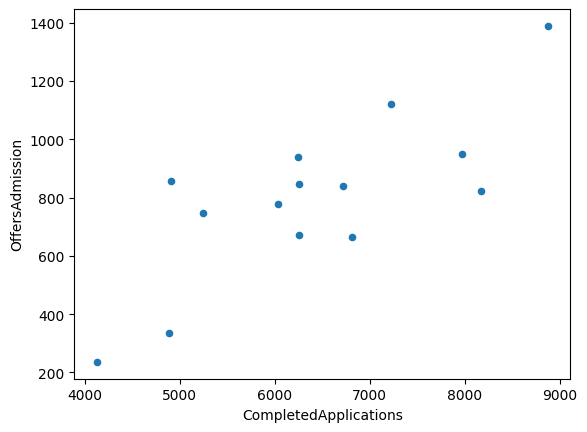

In [59]:
t14.plot.scatter(x= "CompletedApplications", y= "OffersAdmission")

<Axes: xlabel='CompletedApplications', ylabel='OffersAdmission'>

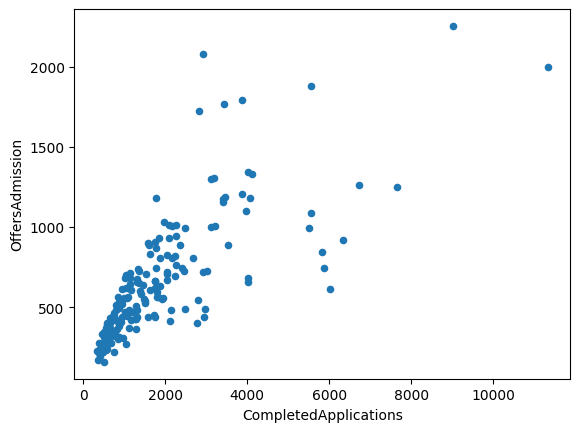

In [60]:
not14.plot.scatter(x= "CompletedApplications", y= "OffersAdmission")

<Axes: xlabel='CompletedApplications', ylabel='OffersAdmission'>

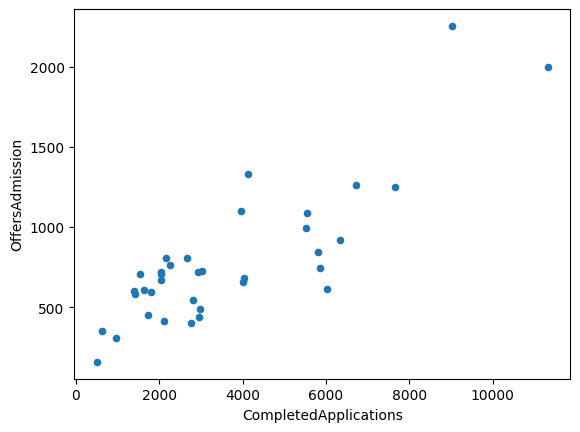

In [61]:
not14stillt50.plot.scatter(x= "CompletedApplications", y= "OffersAdmission")

<Axes: xlabel='All50LSAT', ylabel='All50GPA'>

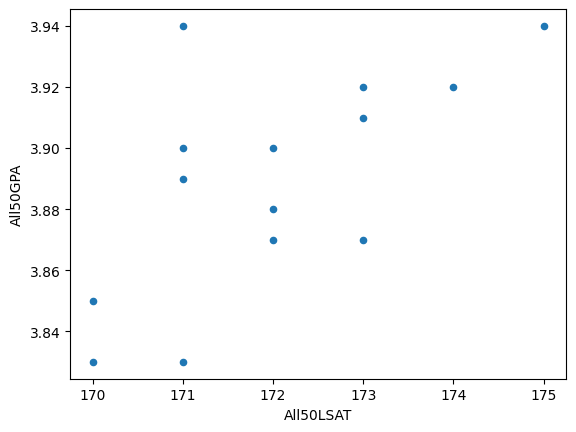

In [55]:
t14.plot.scatter(x= "All50LSAT", y = "All50GPA")

<Axes: xlabel='All50LSAT', ylabel='All50GPA'>

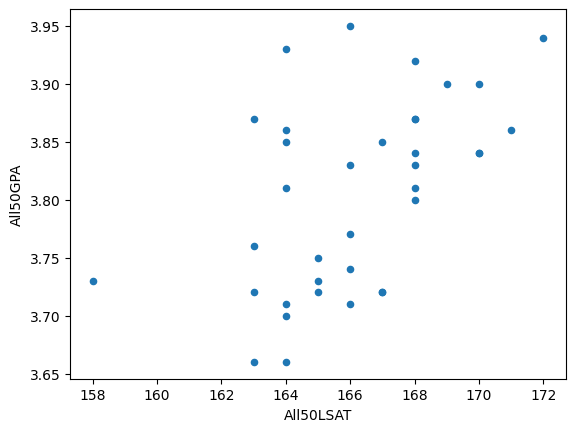

In [56]:
not14stillt50.plot.scatter(x= "All50LSAT", y = "All50GPA")

These graphs visualize what we analysed in the steps before this.

*Section 4: Data Science*

My questions now are focused on determining which statistics are best to predict admission. Debate has persisted over the past couple years over the role of GPAs in admissions, even a bit of debate over the role of the LSAT as it has gone through several changes over the past few sittings (certain sections have been removed, added, changed, etc.). I'll look into these as predictors and see which really matters more in today's law school admissions.

To do this, I will conduct a linear regression of average GPAs, average LSATs, and admissions offers. 

In [62]:
import seaborn as sns
from statsmodels.stats import weightstats
from scipy.stats import norm

In [67]:
numerical_cols = ["t14dummy","t50dummy","CompletedApplications","OffersAdmission","AcceptanceRate","EnrolleesFromApplicantPool","EnrollmentRateFromApp","EnrollmentRateFromOffers","OtherFirstYearEnrolles","TotalFYClassFT","TotalFYClassPT","TotalFYClassAll","All75LSAT","All50LSAT","All25LSAT","All75GPA","All50GPA","All25GPA"]

In [68]:
df_numerical = df[numerical_cols]
df_numerical

,t14dummy,t50dummy,CompletedApplications,OffersAdmission,AcceptanceRate,EnrolleesFromApplicantPool,EnrollmentRateFromApp,EnrollmentRateFromOffers,OtherFirstYearEnrolles,TotalFYClassFT,TotalFYClassPT,TotalFYClassAll,All75LSAT,All50LSAT,All25LSAT,All75GPA,All50GPA,All25GPA
0,1,1,6722,838,12.47,251,3.73,29.95,27,278,0,278,172,170,167,3.90,3.83,3.74
1,1,1,7227,1120,15.50,273,3.78,24.38,35,308,0,308,172,171,166,3.97,3.90,3.66
2,1,1,5246,747,14.24,182,3.47,24.36,21,203,0,203,175,173,169,3.97,3.91,3.81
3,1,1,7972,951,11.93,324,4.06,34.07,78,402,0,402,175,173,171,3.95,3.87,3.78
4,1,1,4913,857,17.44,202,4.11,23.57,6,210,0,210,174,172,170,3.94,3.87,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,0,816,364,44.61,128,15.69,35.16,3,105,26,131,154,151,150,3.53,3.23,2.99
192,0,0,1055,693,65.69,233,22.09,33.62,4,196,38,234,152,150,148,3.50,3.26,2.94
193,0,0,668,402,60.18,137,20.51,34.08,5,118,24,142,152,148,146,3.60,3.30,2.95
194,0,0,750,442,58.93,105,14.00,23.76,11,113,0,113,156,154,151,3.67,3.25,3.02


In [71]:
df_numerical.corr()

,t14dummy,t50dummy,CompletedApplications,OffersAdmission,AcceptanceRate,EnrolleesFromApplicantPool,EnrollmentRateFromApp,EnrollmentRateFromOffers,OtherFirstYearEnrolles,TotalFYClassFT,TotalFYClassPT,TotalFYClassAll,All75LSAT,All50LSAT,All25LSAT,All75GPA,All50GPA,All25GPA
t14dummy,1.000000,0.473936,0.587995,0.106035,-0.489015,0.232704,-0.343206,0.113776,0.603162,0.365398,-0.154570,0.293996,0.556526,0.531520,0.592277,0.386544,0.408597,0.491214
t50dummy,0.473936,1.000000,0.651785,0.208553,-0.671299,0.211775,-0.525730,-0.058543,0.393832,0.353261,-0.263386,0.248758,0.765144,0.774817,0.746449,0.647617,0.691231,0.698487
CompletedApplications,0.587995,0.651785,1.000000,0.674516,-0.725650,0.664437,-0.661589,-0.234313,0.618849,0.769617,-0.062143,0.701228,0.747310,0.757099,0.761154,0.524783,0.594718,0.631720
OffersAdmission,0.106035,0.208553,0.674516,1.000000,-0.220525,0.840987,-0.435041,-0.473600,0.252310,0.801573,0.225727,0.820760,0.348760,0.367631,0.353384,0.142259,0.217775,0.228725
AcceptanceRate,-0.489015,-0.671299,-0.725650,-0.220525,1.000000,-0.224119,0.782305,0.090485,-0.424024,-0.360000,0.236560,-0.263419,-0.787282,-0.804590,-0.792437,-0.636959,-0.693961,-0.728439
EnrolleesFromApplicantPool,0.232704,0.211775,0.664437,0.840987,-0.224119,1.000000,-0.195105,-0.042239,0.436897,0.934544,0.381320,0.993692,0.306477,0.315506,0.325058,0.095218,0.173020,0.215974
EnrollmentRateFromApp,-0.343206,-0.525730,-0.661589,-0.435041,0.782305,-0.195105,1.000000,0.639606,-0.316742,-0.342503,0.313324,-0.223140,-0.725566,-0.752692,-0.740450,-0.516064,-0.563249,-0.590298
EnrollmentRateFromOffers,0.113776,-0.058543,-0.234313,-0.473600,0.090485,-0.042239,0.639606,1.000000,0.090797,-0.090081,0.178335,-0.028825,-0.199563,-0.233817,-0.215028,-0.067821,-0.086918,-0.063723
OtherFirstYearEnrolles,0.603162,0.393832,0.618849,0.252310,-0.424024,0.436897,-0.316742,0.090797,1.000000,0.578958,-0.026935,0.533678,0.455417,0.443349,0.500317,0.255375,0.282264,0.369799
TotalFYClassFT,0.365398,0.353261,0.769617,0.801573,-0.360000,0.934544,-0.342503,-0.090081,0.578958,1.000000,0.045437,0.950418,0.475393,0.481757,0.493794,0.277781,0.343808,0.393014


In [78]:
accept_sd = df_numerical["AcceptanceRate"].std()
gpa_sd = df_numerical["All50GPA"].std()
slope_GPA = df_numerical.corr()['AcceptanceRate']['All50GPA'] * (accept_sd/gpa_sd)
slope_GPA

-54.17823479796292

<Axes: xlabel='All50GPA', ylabel='AcceptanceRate'>

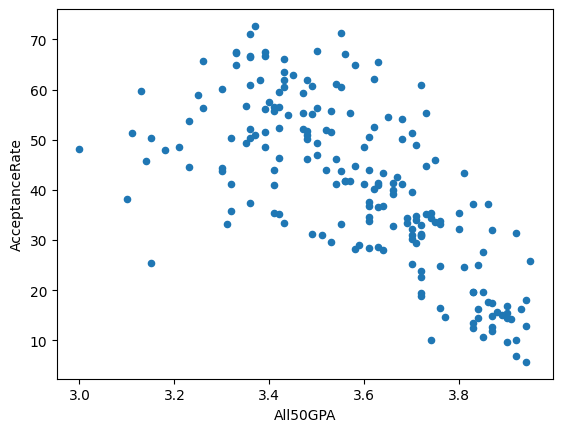

In [83]:
df.plot.scatter(x= "All50GPA", y= "AcceptanceRate")

In [79]:
accept_avg = df_numerical["AcceptanceRate"].mean()
gpa_avg = df_numerical["All50GPA"].mean()
gpaintercept = accept_avg - slope_GPA * gpa_avg
gpaintercept

235.04473801862125

<Axes: xlabel='All50GPA', ylabel='AcceptanceRate'>

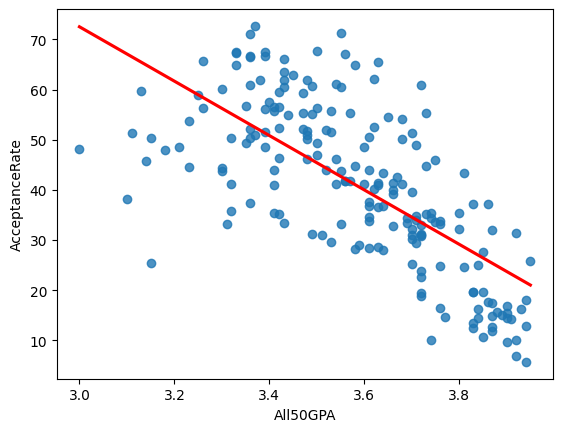

In [91]:
sns.regplot(data=df, x="All50GPA", y="AcceptanceRate", ci=None, line_kws={'color':'red'})

In [73]:
accept_sd = df_numerical["AcceptanceRate"].std()
lsat_sd = df_numerical["All50LSAT"].std()
slope_LSAT = df_numerical.corr()['AcceptanceRate']['All50LSAT'] * (accept_sd/lsat_sd)
slope_LSAT

-1.8472048253171198

<Axes: xlabel='All50LSAT', ylabel='AcceptanceRate'>

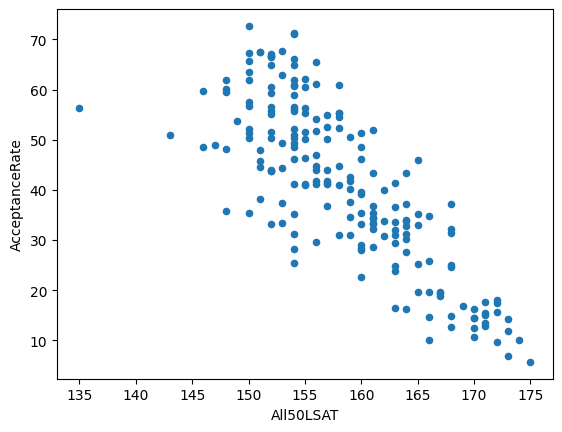

In [82]:
df.plot.scatter(x= "All50LSAT", y= "AcceptanceRate")

In [80]:
accept_avg = df_numerical["AcceptanceRate"].mean()
lsat_avg = df_numerical["All50LSAT"].mean()
lsatintercept = accept_avg - slope_LSAT * lsat_avg
lsatintercept

333.5923092922003

<Axes: xlabel='All50LSAT', ylabel='AcceptanceRate'>

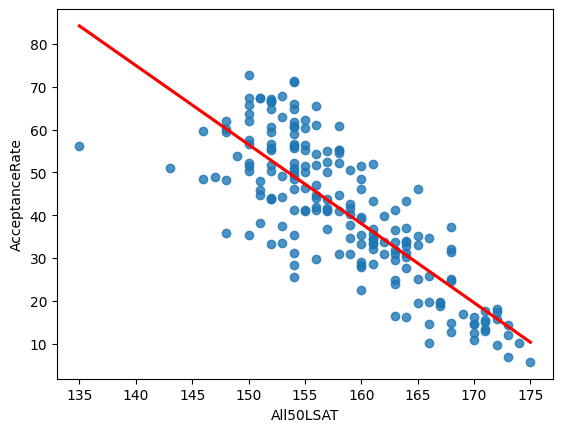

In [81]:
sns.regplot(data=df, x="All50LSAT", y="AcceptanceRate", ci=None, line_kws={'color':'red'})

We looked at individual linear regressions for both All50GPA and All50LSAT, now let's conduct a multi-linear regression on both these variables at the same time.

In [86]:
test_df = df_numerical.sample(frac = 0.2)
test_df

,t14dummy,t50dummy,CompletedApplications,OffersAdmission,AcceptanceRate,EnrolleesFromApplicantPool,EnrollmentRateFromApp,EnrollmentRateFromOffers,OtherFirstYearEnrolles,TotalFYClassFT,TotalFYClassPT,TotalFYClassAll,All75LSAT,All50LSAT,All25LSAT,All75GPA,All50GPA,All25GPA
142,0,0,1307,481,36.80,100,7.65,20.79,3,103,0,103,163,161,156,3.80,3.61,3.25
20,0,1,2802,545,19.45,169,6.03,31.01,3,172,0,172,168,167,162,3.83,3.72,3.51
120,0,0,717,444,61.92,126,17.57,28.38,0,126,0,126,154,150,146,3.59,3.38,2.97
65,0,0,4069,1178,28.95,366,8.99,31.07,23,389,0,389,163,160,157,3.75,3.59,3.39
185,0,0,868,529,60.94,170,19.59,32.14,1,150,20,170,158,154,149,3.69,3.36,3.09
59,0,0,1144,647,56.56,225,19.67,34.78,9,176,53,229,157,154,151,3.60,3.42,3.01
100,0,0,644,430,66.77,137,21.27,31.86,10,148,0,148,156,152,149,3.58,3.36,2.98
98,0,0,3115,1001,32.13,249,7.99,24.88,7,218,38,256,162,161,157,3.80,3.70,3.50
99,0,0,1813,565,31.16,160,8.83,28.32,3,160,0,160,158,154,151,3.71,3.49,3.23
125,0,0,522,345,66.09,91,17.43,26.38,0,91,0,91,158,154,151,3.71,3.43,3.05


In [87]:
train_df = df_numerical[~df_numerical.index.isin(test_df.index)]
train_df

,t14dummy,t50dummy,CompletedApplications,OffersAdmission,AcceptanceRate,EnrolleesFromApplicantPool,EnrollmentRateFromApp,EnrollmentRateFromOffers,OtherFirstYearEnrolles,TotalFYClassFT,TotalFYClassPT,TotalFYClassAll,All75LSAT,All50LSAT,All25LSAT,All75GPA,All50GPA,All25GPA
0,1,1,6722,838,12.47,251,3.73,29.95,27,278,0,278,172,170,167,3.90,3.83,3.74
1,1,1,7227,1120,15.50,273,3.78,24.38,35,308,0,308,172,171,166,3.97,3.90,3.66
2,1,1,5246,747,14.24,182,3.47,24.36,21,203,0,203,175,173,169,3.97,3.91,3.81
3,1,1,7972,951,11.93,324,4.06,34.07,78,402,0,402,175,173,171,3.95,3.87,3.78
4,1,1,4913,857,17.44,202,4.11,23.57,6,210,0,210,174,172,170,3.94,3.87,3.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0,639,406,63.54,95,14.87,23.40,0,64,31,95,154,150,146,3.70,3.43,3.02
191,0,0,816,364,44.61,128,15.69,35.16,3,105,26,131,154,151,150,3.53,3.23,2.99
192,0,0,1055,693,65.69,233,22.09,33.62,4,196,38,234,152,150,148,3.50,3.26,2.94
193,0,0,668,402,60.18,137,20.51,34.08,5,118,24,142,152,148,146,3.60,3.30,2.95


In [90]:
from sklearn.linear_model import LinearRegression
ind = ["All50GPA", "All50LSAT"]
dep = "AcceptanceRate"
model = LinearRegression()
model.fit(train_df[ind], train_df[dep])
predictions = model.predict( test_df[ind] )
predictions

array([35.64059876, 23.82322365, 56.98304169, 37.59117629, 48.04163234,
       48.72509187, 52.39842709, 36.66578806, 49.52246132, 48.83900179,
       49.53657019, 39.99739351, 46.41867571, 43.32899897, 51.94278741,
       14.98161537, 31.95315468, 39.89759245, 47.79970364, 56.64131192,
       49.4085514 , 28.62154922, 44.46809818, 54.5627156 , 46.53258563,
       49.4085514 , 49.29464148, 49.50835246, 54.36311349, 31.38360507,
       88.29208325, 32.87854291, 35.8684186 , 48.04163234, 34.95713923,
       29.67495625, 14.75379552, 41.25040265, 29.43302754])

*Section 5: Overall Summary*

In this project, I worked within a bunch of datapoints from accredited law schools to attempt to find the average GPA and LSAT across all top law schools, differing yield rates across the entire dataset of schools, the correlation between LSAT, GPA, and acceptance rates, and I made a few predictions about acceptance rates based on that data. We found that GPAs and LSATs are elevated at t-14 schools compared to non-t14 and t-50 schools, and we were also able to affirm the idea that law school admissions are trending towards a "go big or go home" mindset with much higher yield rates at t-14 schools than anywhere else. 

Our regressions found correlation was significantly stronger for the LSAT (-0.804590) in relation to the GPA (-0.693961) in terms of acceptance rate, meaning that, as the average LSAT score of a law school goes up, Acceptance Rate gets lower. The same is true of GPA, but correlation was practically stronger with the LSAT. This reinforces recently observed trends of increased importance on the LSAT for law school admissions counsels.